In [13]:
import sys
import json
import math
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family="serif")
rc('font', size=12)
rc('text', usetex=True)

In [24]:
kit_blue_1 = "#4664AA"
kit_blue_2 = "#7D92C3"

run = "athlete" # writtenwork_depth # musicalwork_breadth # athlete # politician_breadth # species_depth # anatomicalstructure_breadth # wikidata
res_glob = pd.read_csv(f"out/_results_{run}.csv", index_col=0)

# Control which classes to analyze. Add or remove rows in res_glob DataFrame
# res_glob = res_glob.loc[[
#                         "Newspaper", "NewspaperRandom",
#                         "Poem", "PoemRandom",
#                         "Boxer", "BoxerWikidata",
#                         "Cyclist", "CyclistWikidata",
#                         ]]

res_disp = res_glob.copy()
# Add following columns
res_disp["ratio_sp"] = res_disp.apply(lambda row: row.n_t / row.n_b, axis=1)
res_disp["rel_k_0_t"] = res_disp.apply(lambda row: row.k_0_t / row.n_b, axis=1)
res_disp["rel_k_0_b"] = res_disp.apply(lambda row: row.k_0_b / row.n_t, axis=1)
# Format integer
res_disp["n_t"] = res_disp["n_t"].map("{:,.0f}".format)
res_disp["n_b"] = res_disp["n_b"].map("{:,.0f}".format)
res_disp["m_g"] = res_disp["m_g"].map("{:,.0f}".format)
res_disp["ndisc_t"] = res_disp["ndisc_t"].map("{:,.0f}".format)
res_disp["ndisc_b"] = res_disp["ndisc_b"].map("{:,.0f}".format)
res_disp["m_t"] = res_disp["m_t"].map("{:,.0f}".format)
res_disp["m_b"] = res_disp["m_b"].map("{:,.0f}".format)
res_disp["k_0_t"] = res_disp["k_0_t"].map("{:,.0f}".format)
res_disp["k_0_b"] = res_disp["k_0_b"].map("{:,.0f}".format)
res_disp["k_med_t"] = res_disp["k_med_t"].map("{:,.0f}".format)
res_disp["c_med_t"] = res_disp["c_med_t"].map("{:,.0f}".format)
res_disp["w_med_t"] = res_disp["w_med_t"].map("{:,.0f}".format)
res_disp["k_med_b"] = res_disp["k_med_b"].map("{:,.0f}".format)
res_disp["c_med_b"] = res_disp["c_med_b"].map("{:,.0f}".format)
res_disp["w_med_b"] = res_disp["w_med_b"].map("{:,.0f}".format)

# Format float with four decimals
res_disp["mean_dens_t"] = res_disp["mean_dens_t"].map("{:,.4f}".format)
res_disp["rc_dens_t"] = res_disp["rc_dens_t"].map("{:,.4f}".format)
res_disp["rc_ncomp_t"] = res_disp["rc_ncomp_t"].map("{:,.4f}".format)
res_disp["rc_slcc_t"] = res_disp["rc_slcc_t"].map("{:,.4f}".format)
res_disp["mean_dens_b"] = res_disp["mean_dens_b"].map("{:,.4f}".format)
res_disp["rc_dens_b"] = res_disp["rc_dens_b"].map("{:,.4f}".format)
res_disp["rc_ncomp_b"] = res_disp["rc_ncomp_b"].map("{:,.4f}".format)
res_disp["rc_slcc_b"] = res_disp["rc_slcc_b"].map("{:,.4f}".format)

display(res_disp[["n_t", "n_b", "dens_t", "dens_b", "rel_k_0_t", "rel_k_0_b", "rc_dens_t", "rc_dens_b",]])

,n_t,n_b,dens_t,dens_b,rel_k_0_t,rel_k_0_b,rc_dens_t,rc_dens_b
Athlete,"404,915","10,030",0.963014,0.014080,0.022532,0.860045,0.0009,0.0000
Boxer,"6,457",535,0.958609,0.151080,0.080374,0.924268,0.0190,0.0015
AmateurBoxer,445,80,1.000000,0.546835,0.350000,inf,0.1734,0.0515
GridironFootballPlayer,"26,560","1,582",0.983335,0.062167,0.049937,0.936145,0.0094,0.0004
AmericanFootballPlayer,"21,579","1,467",0.981450,0.065589,0.053851,0.943556,0.0113,0.0005
MotorsportRacer,"7,838","1,204",0.918255,0.066540,0.056478,0.732202,0.0059,0.0004
RacingDriver,"5,454",894,0.899112,0.080174,0.071588,0.659516,0.0079,0.0007
FormulaOneRacer,902,281,0.979227,0.262023,0.160142,0.930155,0.0643,0.0089
NascarDriver,986,374,0.965884,0.190492,0.171123,0.935091,0.0321,0.0060
WinterSportPlayer,"27,278","3,425",0.913646,0.040078,0.065985,0.779676,0.0033,0.0001


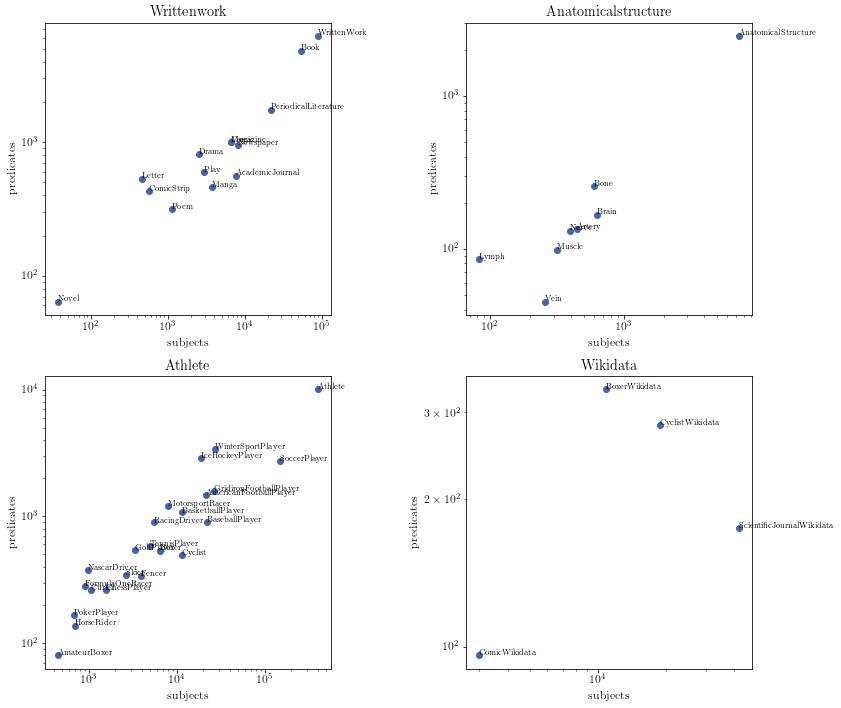

In [25]:
# Number of subjects and predicates per class

res = res_glob

runs = [
    "writtenwork_depth",
    "anatomicalstructure_breadth",
    "athlete",
    "wikidata",
]

nrows = math.ceil(len(runs) / 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, nrows*5))
for run in runs:
    res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
#     display(res[["n_t", "n_b", "k_t_g", "k_b_g"]])
    runnr = runs.index(run)
    row = math.floor(runnr / 2)
    col = runnr % 2
    axes[row, col].set_title(run.split("_")[0].title())
    axes[row, col].set_xlabel("subjects")
    axes[row, col].set_ylabel("predicates")
    
    axes[row, col].scatter(res["n_t"], res["n_b"], color=kit_blue_1, marker="o")
    for i, label in enumerate(res.index):
        axes[row, col].annotate(label, (res["n_t"][i], res["n_b"][i]), fontsize=8)
    axes[row, col].set_xscale("log")
    axes[row, col].set_yscale("log")
    axes[row, col].set_xlabel("subjects")
    axes[row, col].set_ylabel("predicates")

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

Compare relative values e.g. (k_mean_t / n_t) ?


,n_t,n_b,ndisc_t,ndisc_b,k_t_g,k_b_g,k_mean_t,k_sd_t,k_mean_b,k_sd_b,k_med_t,k_med_b,superclass
Athlete,"404,915","10,030",5,3,23.804312,960.989332,389942.600672,46501.647997,141.170639,316.442905,"397,634",58,Person
Boxer,"6,457",535,0,0,19.388571,234.003738,6188.782716,806.871368,80.676636,87.724793,"6,308",46,Athlete
AmateurBoxer,445,80,0,0,18.067416,100.500000,406.997753,83.233434,33.925000,20.900822,424,28,AmateurBoxer
GridironFootballPlayer,"26,560","1,582",0,0,30.873870,518.337547,26116.387952,2019.505431,98.285714,132.572454,"26,350",51,Athlete
AmericanFootballPlayer,"21,579","1,467",0,0,32.475879,477.707566,21177.732240,1749.866400,96.154056,127.296404,"21,379",51,GridironFootballPlayer
MotorsportRacer,"7,838","1,204",0,0,21.165476,137.786545,7196.368206,1056.392854,80.048173,113.029129,"7,512",41,Athlete
RacingDriver,"5,454",894,0,0,21.190869,129.278523,4902.859919,781.192351,67.326622,91.433737,"5,171",36,MotorsportRacer
FormulaOneRacer,902,281,0,11,26.060976,83.654804,882.283814,58.603249,49.140741,48.889166,890,35,RacingDriver
NascarDriver,986,374,0,0,26.985801,71.144385,951.395538,104.550675,54.914439,53.834845,966,36,RacingDriver
WinterSportPlayer,"27,278","3,425",0,0,25.829203,205.713577,24921.523499,4123.415883,137.226277,190.696455,"26,072",61,Athlete


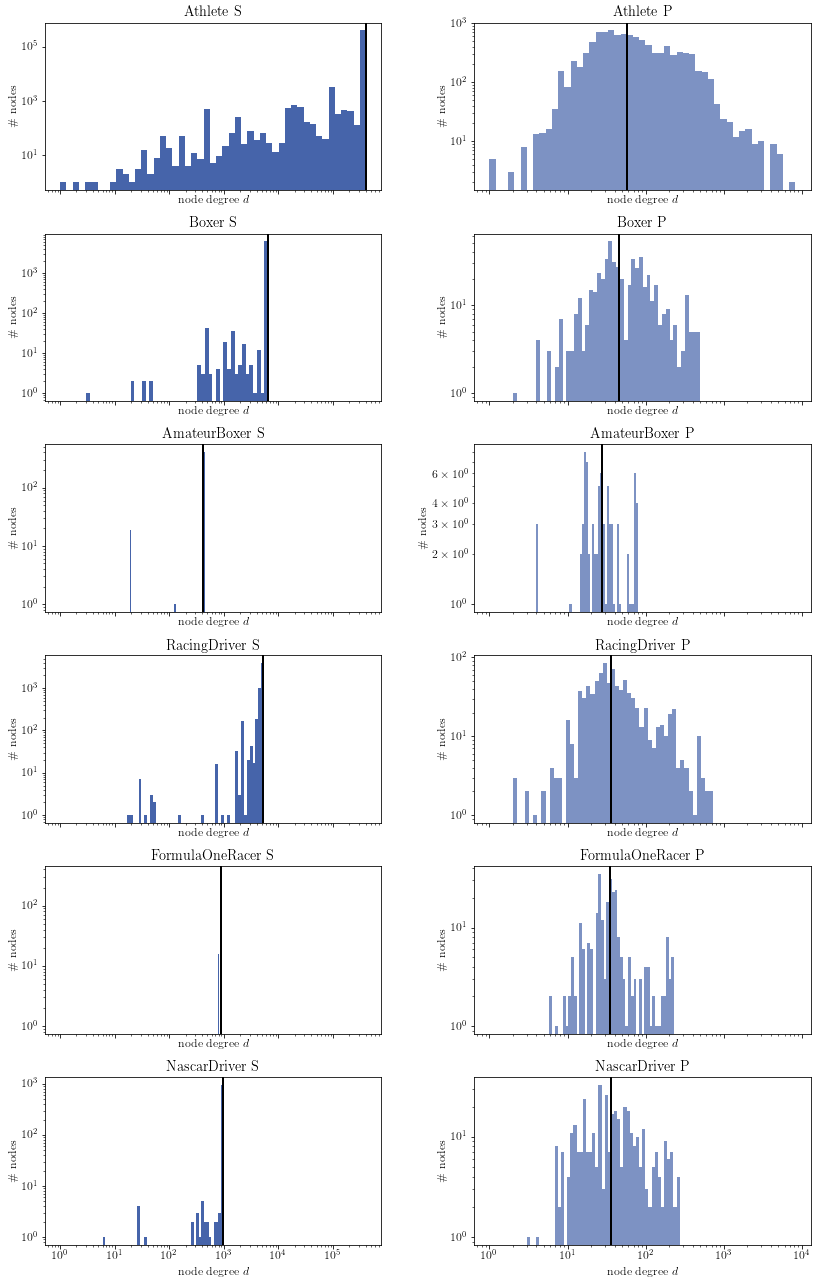

In [26]:
# Degree histogram of top and bot onemode graphs (log log scale)

res = res_glob
# classes = list(res.index.values)
classes = [
    "Athlete",
    "Boxer",
    "AmateurBoxer",
    "RacingDriver",
    "FormulaOneRacer",
    "NascarDriver",
]
nrows = len(classes)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="col", sharey="none", figsize=(12, 3 * nrows))
for classname in classes:
    row = classes.index(classname)
    # Top
    with open(f"out/{classname}/{classname}.t.k.json", "r") as input_file:
        dist = json.load(input_file)
    n_t = res.loc[classname, "n_t"]
    k = []
    for degree, count in dist.items():
        k.extend([int(degree)] * count)

    logbins = np.geomspace(min(k), max(k), 50) # geomspace cannot include 0 (disc nodes)
    axes[row, 0].set_xscale("log")
    axes[row, 0].set_yscale("log")
    axes[row, 0].set_title(classname + " S")
    axes[row, 0].axvline(np.median(k), color='k', linewidth=2)
    axes[row, 0].set_xlabel("node degree $d$")
    axes[row, 0].set_ylabel("\# nodes")
    # min_ylim, max_ylim = axes[row, 0].get_ylim()
    # axes[row, 0].text(np.median(k) * 1.1, max_ylim * 0.9, 'Mean: {:.2f}'.format(np.median(k))) # Draw median value
    hist, bins, _ = axes[row, 0].hist(k, bins=logbins, color=kit_blue_1)
    # Bot
    with open(f"out/{classname}/{classname}.b.k.json", "r") as input_file:
        dist = json.load(input_file)
    n_b = res.loc[classname, "n_b"]
    k = []
    for degree, count in dist.items():
        k.extend([int(degree)] * count)

    logbins = np.geomspace(min(k), max(k), 50)
    axes[row, 1].set_xscale("log")
    axes[row, 1].set_yscale("log")
    axes[row, 1].set_title(classname + " P")
    axes[row, 1].axvline(np.median(k), color='k', linewidth=2)
    axes[row, 1].set_xlabel("node degree $d$")
    axes[row, 1].set_ylabel("\# nodes")
    hist, bins, _ = axes[row, 1].hist(k, bins=logbins, color=kit_blue_2)

print("Compare relative values e.g. (k_mean_t / n_t) ?")
display(res_disp[["n_t", "n_b", "ndisc_t", "ndisc_b", "k_t_g", "k_b_g", "k_mean_t", "k_sd_t", "k_mean_b", "k_sd_b", "k_med_t", "k_med_b", "superclass"]])

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

fig.savefig("ddist.pdf") #, bbox_inches='tight', dpi=300)

In [5]:
# Latex table

res_tex = res_disp[["n_t", "n_b", "ndisc_t", "ndisc_b", "k_t_g", "k_b_g", "k_mean_t", "k_sd_t", "k_mean_b", "k_sd_b", "k_med_t", "k_med_b", "superclass"]]
res_tex.to_latex("table.tex")

In [5]:
# Get subjects and predicates whose nodedegree is in given range

def get_nodes_k_range(classname, onemode, start, end):
    with open(f"out/{classname}/{classname}.{onemode}.nk.json", "r") as in_file:
        nodedegrees = json.load(in_file)
    myresults = []
    for entity, degree in nodedegrees.items():
        if degree in range(start, end):
            myresults.append((entity, degree))
    myresults.sort(key=lambda x: x[1])
    print(f"{classname} {onemode}")
    for entity, degree in myresults[:20]:
        print(degree, entity)

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)
classes = ["Cyclist"]
for classname in classes:
    get_nodes_k_range(classname, "t", 900, 2000)
    get_nodes_k_range(classname, "b", 0, 10)
    print("\n")
    
# myresult = {key: mydict[key] for key in sorted(mydict, key=mydict.get, reverse=True)[:9]} # Get n highest/lowest pairs

Cyclist t
1198 http://dbpedia.org/resource/Nácor_Burgos
1198 http://dbpedia.org/resource/Tullio_Campagnolo
1198 http://dbpedia.org/resource/The_Collective_(mountain_biking)
1198 http://dbpedia.org/resource/Raphaël_Gagné
1198 http://dbpedia.org/resource/Haro_Bikes
1198 http://dbpedia.org/resource/Mooinjer_veggey
1198 http://dbpedia.org/resource/Alexis_Gewertz_Shepard
1198 http://dbpedia.org/resource/Tristyn_Kronk
1198 http://dbpedia.org/resource/Ryan_Nyquist
1198 http://dbpedia.org/resource/Richard_Sachs
1198 http://dbpedia.org/resource/Kris_Holm
1362 http://dbpedia.org/resource/Danny_Nelissen
Cyclist b
1 http://dbpedia.org/property/section
1 http://dbpedia.org/property/nonum
1 http://dbpedia.org/property/limit
2 http://dbpedia.org/property/side
2 http://dbpedia.org/property/top
2 http://dbpedia.org/property/num
6 http://dbpedia.org/property/cname
7 http://dbpedia.org/property/coordinates
7 http://dbpedia.org/property/birth
7 http://dbpedia.org/property/sname
7 http://dbpedia.org/proper

,n_t,n_b,m_t,m_b,w_med_t,w_med_b,superclass
DocumentDBLP,"7,688",22,"29,548,828",193,9,183,none
AcademicJournal,"7,688",561,"28,393,284","13,269",16,1,PeriodicalLiterature
ScientificJournalWikidata,"42,283",174,"893,904,162","3,899",6,2,none
WrittenWork,"90,862","6,235","2,887,891,628","289,775",3,1,Work


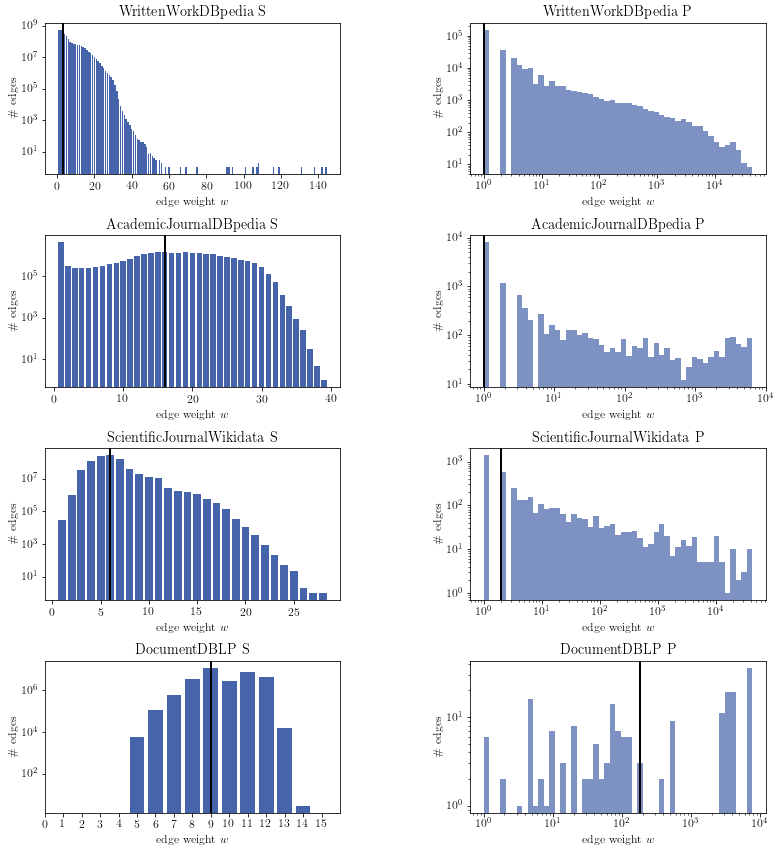

In [13]:
# Weight hist top and bot
# Difficulty: m_t very large, manual for t

res = res_glob
# classes = list(res.index.values)
classes = [
    "WrittenWork",
    "AcademicJournal",
    "ScientificJournalWikidata",
    "DocumentDBLP",
]

display(res_disp[["n_t", "n_b", "m_t", "m_b", "w_med_t", "w_med_b", "superclass"]])

fig, axes = plt.subplots(nrows=len(classes), ncols=2, sharex="none", sharey="none", figsize=(12, 3 * len(classes)))
for classname in classes:
    row = classes.index(classname)
    # Top (density dist)
    w = []
    pw = []
    with open(f"out/{classname}/{classname}.t.w.json", "r") as input_file:
        dist = json.load(input_file)
    median = res.loc[classname, "w_med_t"]
    for weight, count in dist.items():
        if int(weight) > 0:
            w.append(int(weight))
            pw.append(count)
    axes[row, 0].bar(w, pw, align='center', color=kit_blue_1)
    axes[row, 0].axvline(median, color='k', linewidth=2)
    axes[row, 0].set_title(classname + " S")
    if classname == "AcademicJournal":
        axes[row, 0].set_title("AcademicJournalDBpedia" + " S")
    if classname == "WrittenWork":
        axes[row, 0].set_title("WrittenWorkDBpedia" + " S")
    axes[row, 0].set_yscale("log")
    axes[row, 0].tick_params(axis="x", reset=True, top=False)
#     axes[row, 0].set_xticks(range(5, max(w), 5))
#     axes[row, 0].set_xticklabels(range(5, max(w), 5))
    axes[row, 0].set_xlabel("edge weight $w$")
    axes[row, 0].set_ylabel("\# edges")
    # Bot (hist)
    w = []
    with open(f"out/{classname}/{classname}.b.w.json", "r") as input_file:
        dist = json.load(input_file)
    for weight, count in dist.items():
        if int(weight) > 0:
            w.extend([int(weight)] * count)
    
    logbins = np.geomspace(min(w), max(w), 50)
    axes[row, 1].set_xscale("log")
    axes[row, 1].set_yscale("log")
    axes[row, 1].set_title(classname + " P")
    if classname == "AcademicJournal":
        axes[row, 1].set_title("AcademicJournalDBpedia" + " P")
    if classname == "WrittenWork":
        axes[row, 1].set_title("WrittenWorkDBpedia" + " P")
    axes[row, 1].set_xlabel("edge weight $w$")
    axes[row, 1].set_ylabel("\# edges")
#     print("wmedp", np.median(w))
    axes[row, 1].axvline(np.median(w), color='k', linewidth=2)
    hist, bins, _ = axes[row, 1].hist(w, bins=logbins, color=kit_blue_2)
#     print(bins)
    emptybins = 0
    for patchobj in _:
#         print(patchobj)
        if patchobj.get_height() == 0:
            emptybins += 1
#     print(classname, emptybins)

axes[3, 0].set_xlim(0, 16)
axes[3, 0].set_xticks(range(0,16))

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

fig.savefig("wdist.pdf")

In [31]:
# Latex table wdist
res_tex = res_disp[["n_t", "n_b", "m_t", "m_b", "w_med_t", "w_med_b", "superclass"]]
# display(res_tex)
res_tex.to_latex("table_wdist.tex")

In [8]:
# Mean of weight distributions for subjects
# If mean > median, distribution is right skewed
# If mean < median, distribution is left skewed
res = res_glob
classes = [
    "DocumentDBLP",
    "WrittenWork",
    "AcademicJournal",
    "ScientificJournalWikidata",
]
for classname in classes:
    w_mean_t = 0
    m_t = res.loc[classname]["m_t"]
    w_med_t = res.loc[classname]["w_med_t"]
    with open(f"out/{classname}/{classname}.t.w.json", "r") as input_file:
        wdist = json.load(input_file)
    for weight, count in wdist.items():
        w_mean_t += int(weight) * (count / m_t)
    if w_mean_t > w_med_t:
        skewness = "right skewed"
    else:
        skewness = "left skewed"
    print(classname, w_mean_t, w_med_t, skewness)

DocumentDBLP 9.843906533281118 9.0 right skewed
WrittenWork 4.890100030097115 3.0 right skewed
AcademicJournal 15.188601255141883 16.0 left skewed
ScientificJournalWikidata 5.876431095529454 6.0 left skewed


,n_t,n_b,k_t_g,k_b_g,c_mean_t,c_sd_t,c_mean_b,c_sd_b,c_med_t,c_med_b,superclass
DocumentDBLP,"7,688.00",22.00,11.33,"3,964.50","75,670.11","3,794.29","41,201.91","33,871.18","76,149.00","39,087.00",none
AcademicJournal,"7,688.00",561.00,22.74,311.62,"112,203.53","44,751.07","7,932.95","30,371.82","127,212.00",29.50,PeriodicalLiterature
ScientificJournalWikidata,"42,283.00",174.00,8.35,"2,028.08","248,467.05","38,230.14","17,598.07","58,289.78","252,703.00",75.00,none
WrittenWork,"90,862.00","6,235.00",15.74,229.43,"310,860.44","205,948.56","4,633.74","40,442.02","305,451.50",63.00,Work


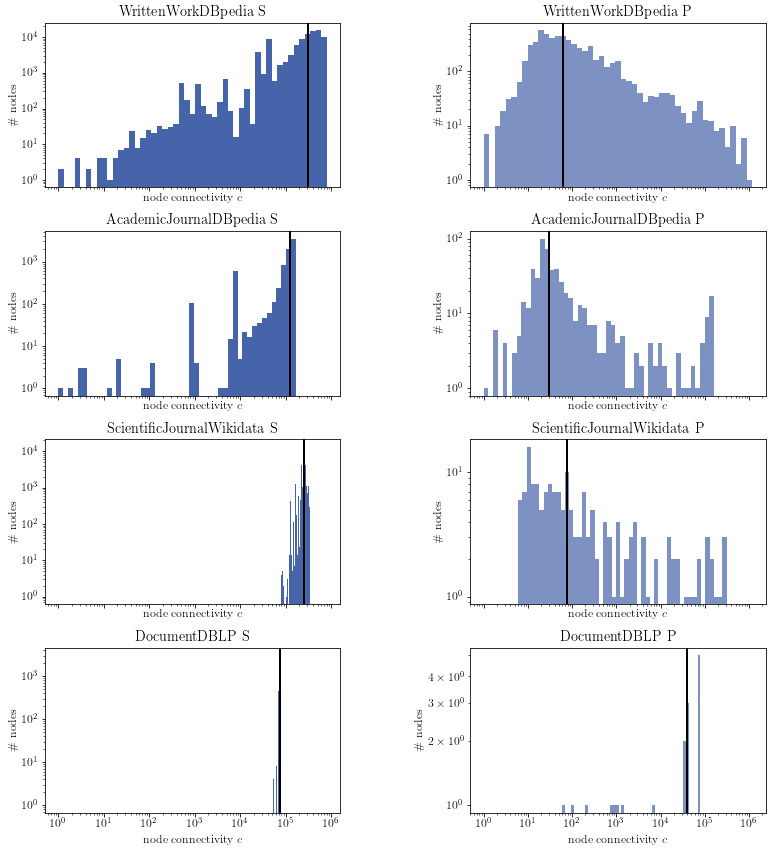

In [34]:
# Connectivity histogram of top and bot onemode graphs

res = res_glob
# classes = list(res.index.values)
classes = [
    "WrittenWork",
    "AcademicJournal",
    "ScientificJournalWikidata",
    "DocumentDBLP",
]

pd.options.display.float_format = '{:,.2f}'.format
display(res[["n_t", "n_b", "k_t_g", "k_b_g", "c_mean_t", "c_sd_t", "c_mean_b", "c_sd_b", "c_med_t", "c_med_b", "superclass"]])

nrows = len(classes)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="col", sharey="none", figsize=(12, 3 * nrows))
for classname in classes:
    row = classes.index(classname)
    # Top
    with open(f"out/{classname}/{classname}.t.c.json", "r") as input_file:
        dist = json.load(input_file)
    c = []
    for connectivity, count in dist.items():
        c.extend([int(connectivity)] * count)

    logbins = np.geomspace(min(c), max(c), 50) # geomspace cannot include 0 (disc nodes)
    axes[row, 0].set_xscale("log")
    axes[row, 0].set_yscale("log")
    axes[row, 0].set_title(classname + " S")
    if classname == "AcademicJournal":
        axes[row, 0].set_title("AcademicJournalDBpedia" + " S")
    if classname == "WrittenWork":
        axes[row, 0].set_title("WrittenWorkDBpedia" + " S")
    axes[row, 0].axvline(np.median(c), color='k', linewidth=2)
    axes[row, 0].set_xlabel("node connectivity $c$")
    axes[row, 0].set_ylabel("\# nodes")
    # min_ylim, max_ylim = axes[row, 0].get_ylim()
    # axes[row, 0].text(np.median(k) * 1.1, max_ylim * 0.9, 'Mean: {:.2f}'.format(np.median(k))) # Draw median value
    hist, bins, _ = axes[row, 0].hist(c, bins=logbins, color=kit_blue_1)
    # Bot
    with open(f"out/{classname}/{classname}.b.c.json", "r") as input_file:
        dist = json.load(input_file)
    c = []
    for connectivity, count in dist.items():
        c.extend([int(connectivity) for i in range(0, count)])

    logbins = np.geomspace(min(c), max(c), 50)
    axes[row, 1].set_xscale("log")
    axes[row, 1].set_yscale("log")
    axes[row, 1].set_title(classname + " P")
    if classname == "AcademicJournal":
        axes[row, 1].set_title("AcademicJournalDBpedia" + " P")
    if classname == "WrittenWork":
        axes[row, 1].set_title("WrittenWorkDBpedia" + " P")
    axes[row, 1].axvline(np.median(c), color='k', linewidth=2)
    axes[row, 1].set_xlabel("node connectivity $c$")
    axes[row, 1].set_ylabel("\# nodes")
    hist, bins, _ = axes[row, 1].hist(c, bins=logbins, color=kit_blue_2)

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

fig.savefig("cdist.pdf") #, bbox_inches='tight', dpi=300)

In [43]:
# Latex table connectivity
res_tex = res_disp[["w_med_t", "w_med_b", "c_med_t", "c_med_b", "c_sd_t", "c_sd_b"]]
display(res_tex)
res_tex.to_latex("table.tex")

,w_med_t,w_med_b,c_med_t,c_med_b,c_sd_t,c_sd_b
DocumentDBLP,8,5,"76,149","39,087",3794.285253,33871.180345
AcademicJournal,16,1,"127,212",30,44751.065579,30371.817482
ScientificJournalWikidata,6,2,"252,703",75,38230.141449,58289.776769
WrittenWork,3,1,"305,452",63,205948.561307,40442.021439


In [9]:
# Get subjects and predicates whose connectivity is in given range

def get_nodes_c_range(classname, onemode, start, end):
    with open(f"out/{classname}/{classname}.{onemode}.nc.json", "r") as in_file:
        nodeconnectivities = json.load(in_file)
    myresults = []
    for entity, connectivity in nodeconnectivities.items():
        if connectivity in range(start, end):
            myresults.append((entity, connectivity))
    myresults.sort(key=lambda x: x[1])
    print(f"{classname} {onemode}")
    for entity, connectivity in myresults[:20]:
        print(connectivity, entity)

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)
classes = ["Comic"]
for classname in classes:
    get_nodes_c_range(classname, "t", 10, 200)
    get_nodes_c_range(classname, "b", 40000, 100000)
    print("\n")
    
# myresult = {key: mydict[key] for key in sorted(mydict, key=mydict.get, reverse=True)[:9]} # Get n highest/lowest pairs

Comic t
22 http://dbpedia.org/resource/Cake_theory
25 http://dbpedia.org/resource/Teller_Amendment
32 http://dbpedia.org/resource/Watch_Out_Beagles_About
32 http://dbpedia.org/resource/Is
61 http://dbpedia.org/resource/Food_Additives_Amendment_of_1958
72 http://dbpedia.org/resource/The_Belles_of_St._Lemons
77 http://dbpedia.org/resource/Kefauver_Harris_Amendment
84 http://dbpedia.org/resource/Protect_America_Act_of_2007
86 http://dbpedia.org/resource/Chemical_Diversion_and_Trafficking_Act
89 http://dbpedia.org/resource/Refugee_Act
99 http://dbpedia.org/resource/Johnny_Bean_from_Happy_Bunny_Green
101 http://dbpedia.org/resource/Ecosystem_health
101 http://dbpedia.org/resource/Billy_the_Cat_and_Katie
101 http://dbpedia.org/resource/Pork_barrel
101 http://dbpedia.org/resource/Illinois_Fair_Tax
101 http://dbpedia.org/resource/Store_Wars
115 http://dbpedia.org/resource/Ball_Boy_(Beano)
115 http://dbpedia.org/resource/Number_13_Beano_Street
115 http://dbpedia.org/resource/The_Numskulls
115 h

n_t_super 404915.0
n_b_super 10030.0
n_b_th Athlete 3.0
n_b_th MotorsportRacer 11.0


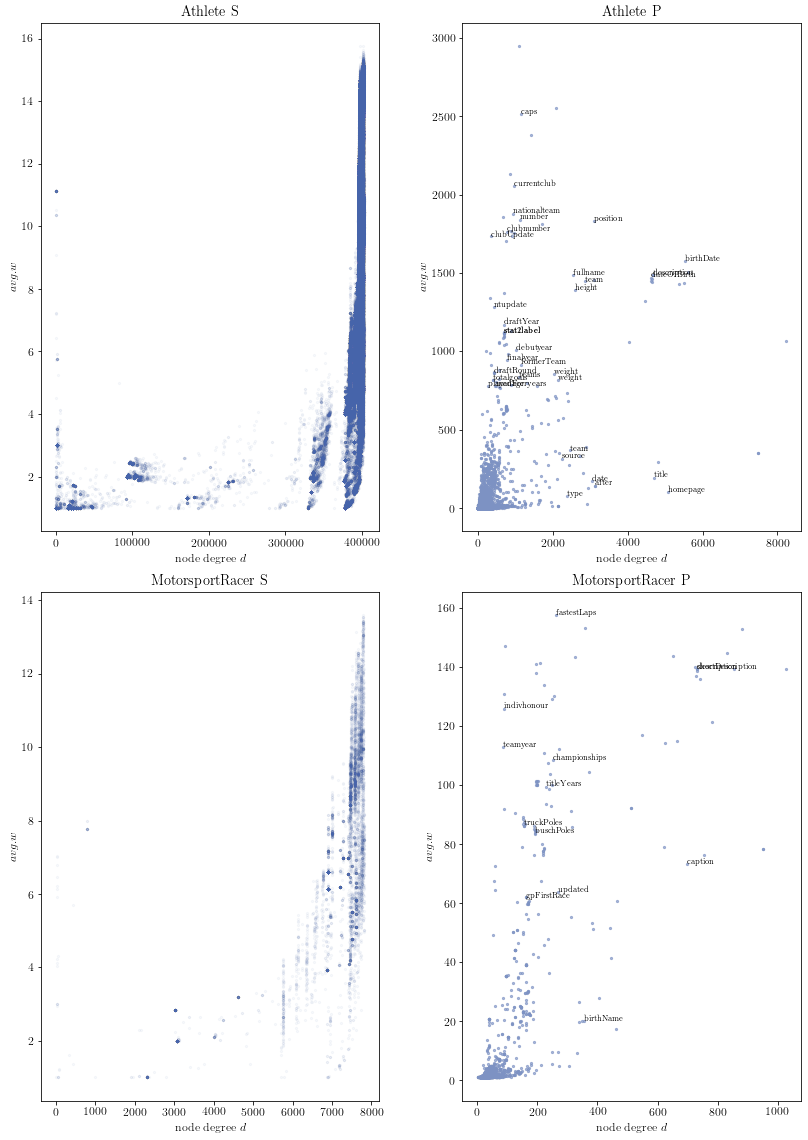

In [14]:
# Average edge weight (connectivity based) over degree per entity scatterplot

res = res_glob
# classes = list(res.index.values)
classes = [
    "Athlete",
#     "Boxer",
    "MotorsportRacer",
#     "IceHockeyPlayer",
]
nrows = len(classes)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, nrows*8))
n_t_super = res["n_t"].iloc[0]
n_b_super = res["n_b"].iloc[0]
print("n_t_super", n_t_super)
print("n_b_super", n_b_super)
for classname in classes:
    row = classes.index(classname)
    # Top
    n = []
    k = []
    c = []
    with open(f"out/{classname}/{classname}.t.nk.json", "r") as input_file:
        nk_dist = json.load(input_file)
    with open(f"out/{classname}/{classname}.t.nc.json", "r") as input_file:
        nc_dist = json.load(input_file)

    for key, value in nk_dist.items():
        n.append(key.split('/')[-1][:9])
        k.append(value)
        c.append(nc_dist.get(key) / value)

    axes[row, 0].set_title(classname + " S")
    axes[row, 0].set_xlabel("node degree $d$")
    axes[row, 0].set_ylabel("$avg. w$")
    axes[row, 0].scatter(k, c, s=5, color=kit_blue_1+"0a")
#     Only annotate some entities
#     n_t = res.loc[classname, "n_t"]
#     n_t_th = round(np.interp(n_t, [0, n_t_super], [100, 600]))
#     print(f"n_t_th {classname} {n_t_th}")
#     for i, label in enumerate(n): 
#         if (round(c[i]) % 2 == 0 and i % n_t_th == 0):
#             label = label.replace("_", "")
#             label = label.replace("\\", "")
#             axes[row, 1].annotate(label, (k[i], c[i]), fontsize=8)
    # Bot
    n = []
    k = []
    c = []
    with open(f"out/{classname}/{classname}.b.nk.json", "r") as input_file:
        nk_dist = json.load(input_file)
    with open(f"out/{classname}/{classname}.b.nc.json", "r") as input_file:
        nc_dist = json.load(input_file)

    for key, value in nk_dist.items():
        n.append(key.split('/')[-1])
        k.append(value)
        c.append(nc_dist.get(key) / value)
    
    axes[row, 1].set_title(classname + " P")
    axes[row, 1].set_xlabel("node degree $d$")
    axes[row, 1].set_ylabel("$avg. w$")
    axes[row, 1].scatter(k, c, s=5, color=kit_blue_2+"aa")
    n_b = res.loc[classname, "n_b"]
    n_b_th = round(np.interp(n_b, [0, n_b_super], [12, 3]))
    print(f"n_b_th {classname} {n_b_th}")
    for i, label in enumerate(n): # Annotate only some entities
        if ((k[i] > (axes[row, 1].get_xlim()[1] * 0.25) and i % n_b_th == 0)
            or (c[i] > (axes[row, 1].get_ylim()[1] * 0.25) and i % n_b_th == 0)):
            axes[row, 1].annotate(label, (k[i], c[i]), fontsize=8)

axes[0, 0].set_xticks([0, 100000, 200000, 300000, 400000])

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

fig.savefig("ckscatter.png", bbox_inches='tight', dpi=300)

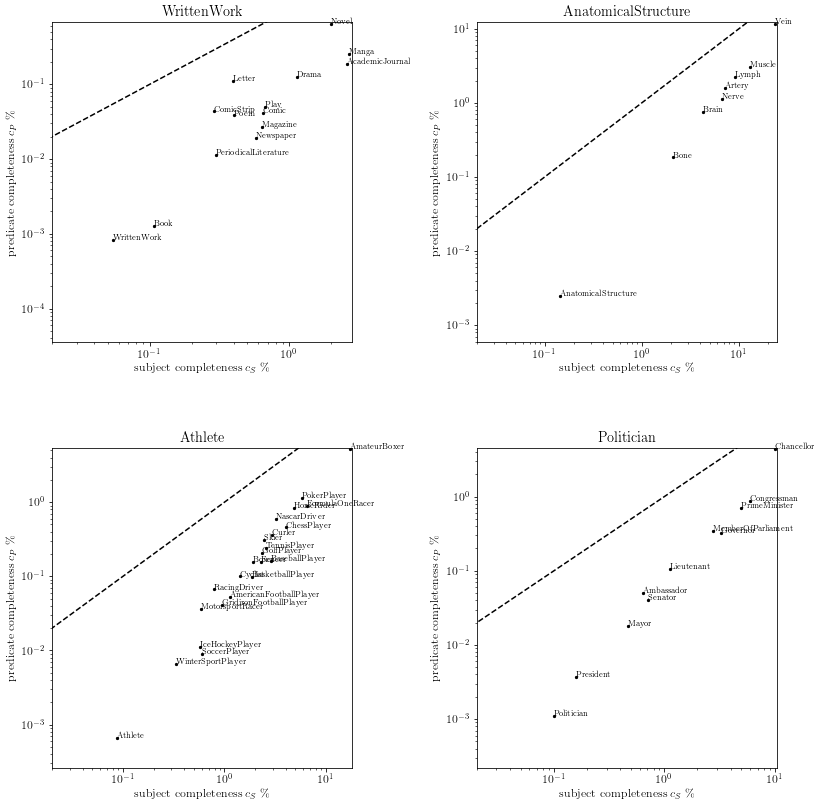

In [4]:
# rc_t over rc_b (in %) for each class and each run scatterplot
runs = [
    "writtenwork_depth",
    "anatomicalstructure_breadth",
    "athlete",
    "politician_breadth",
]

nrows = math.ceil(len(runs) / 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, nrows*6))
for run in runs:
    label = []
    sclass = []
    subj = []
    pred = []
    res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
    for classname in res.index.values:
        label.append(classname)
        sclass.append(res.loc[classname, "superclass"])
        subj.append(res.loc[classname, "rc_dens_t"] * 100)
        pred.append(res.loc[classname, "rc_dens_b"] * 100)

    runnr = runs.index(run)
    row = math.floor(runnr / 2)
    col = runnr % 2
#     axes[row, col].set_title(run.split("_")[0])
    axes[row, col].set_xlabel("subject completeness $c_{S}$ \%")
    axes[row, col].set_ylabel("predicate completeness $c_{P}$ \%")
    axes[row, col].scatter(subj, pred, marker="o", s=5, color="black")
    for i, label in enumerate(label):
        axes[row, col].annotate(label, (subj[i], pred[i]), fontsize=8)

    xmin, xmax = axes[row, col].get_xlim()
    ymin, ymax = axes[row, col].get_ylim()
    axes[row, col].set_xlim(0.02, xmax)
    axes[row, col].set_ylim(ymin - (ymin * 1.001), ymax)

    axes[row, col].set_xscale("log")
    axes[row, col].set_yscale("log")

    axes[row, col].autoscale(False)

    origin_x = np.linspace(0.001,100,3)
    origin_y = origin_x
    axes[row, col].plot(origin_x, origin_y, color="black", linestyle="dashed")

axes[0, 0].set_title("WrittenWork")
axes[0, 1].set_title("AnatomicalStructure")
axes[1, 0].set_title("Athlete")
axes[1, 1].set_title("Politician")
    
plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

fig.savefig("rc-eachrun.pdf") #, bbox_inches='tight', dpi=300)

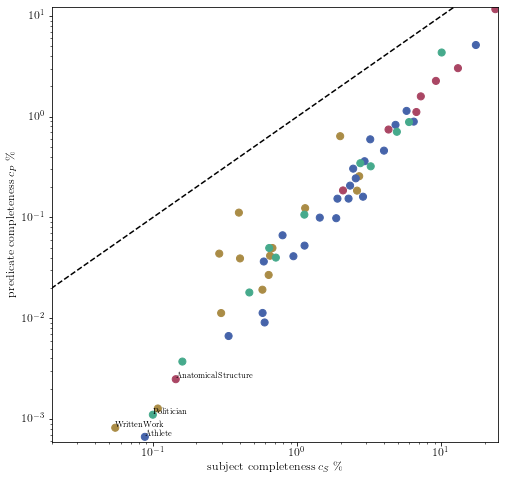

In [5]:
# rc_t over rc_b (in %) for each class and each run in one single scatterplot
runs = [
    "writtenwork_depth",
    "anatomicalstructure_breadth",
    "athlete",
    "politician_breadth",
]

label = []
subj = []
pred = []
color = []

for run in runs:
    res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
    for classname in res.index.values:
        if classname in ["WrittenWork", "AnatomicalStructure", "Athlete", "Politician"]:
            label.append(classname)
        else:
            label.append("")
        subj.append(res.loc[classname, "rc_dens_t"] * 100)
        pred.append(res.loc[classname, "rc_dens_b"] * 100)
        if run == "writtenwork_depth":
            color.append("#aa8c46")
        elif run == "anatomicalstructure_breadth":
            color.append("#aa4664")
        elif run == "athlete":
            color.append("#4664aa")
        elif run == "politician_breadth":
            color.append("#46aa8c")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.set_xlabel("subject completeness $c_{S}$ \%")
ax.set_ylabel("predicate completeness $c_{P}$ \%")
ax.scatter(subj, pred, marker="o", s=50, color=color)
for i, label in enumerate(label):
    ax.annotate(label, (subj[i], pred[i]), fontsize=8)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.set_xlim(0.02, xmax)
ax.set_ylim(ymin - (ymin * 1.001), ymax)

ax.set_xscale("log")
ax.set_yscale("log")

ax.autoscale(False)

origin_x = np.linspace(0.001,100,3)
origin_y = origin_x
origin_line = ax.plot(origin_x, origin_y, color="black", linestyle="dashed")

fig.savefig("rc-allruns.pdf") #, bbox_inches='tight', dpi=300)

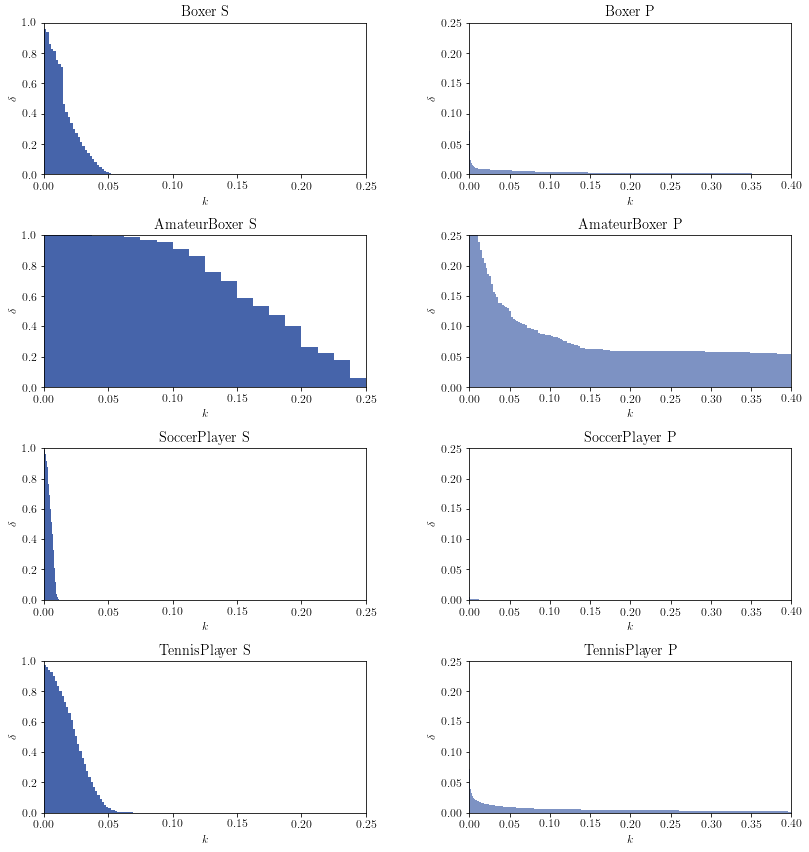

In [35]:
# KNC plots for each superclass and its subclasses

res = res_glob

classes = [
    "Boxer",
    "AmateurBoxer",
    "SoccerPlayer",
    "TennisPlayer",
]

fig, axes = plt.subplots(len(classes), 2, sharex="none", sharey="col", figsize=(12, 3 * len(classes)))

for classname in classes:
    row = classes.index(classname)
    try:
        df_t = pd.read_csv(f"out/{classname}/{classname}.t.knc.csv")
        df_b = pd.read_csv(f"out/{classname}/{classname}.b.knc.csv")
    except FileNotFoundError as e:
        print(classname, e)
    n_t = res.loc[classname, "n_t"]
    n_b = res.loc[classname, "n_b"]

    # Top
    k = []
    dens = []
    ncomp = []
    ncomp_abs = []
    slcc = []
    slcc_abs = []
    has_ncomp = False
    has_slcc = False
    if "ncomponents" in df_t.columns:
        has_ncomp = True
    if "slcc" in df_t.columns:
        has_slcc = True

    for i, knc_row in df_t.iterrows():
        k.append(knc_row["k"] / n_b)
        dens.append(knc_row["density"])
        if has_ncomp:
            ncomp.append((n_t - knc_row["ncomponents"]) / (n_t - 1))
            ncomp_abs.append(knc_row["ncomponents"])
        if has_slcc:
            slcc.append((knc_row["slcc"] - 1) / (n_t - 1))
            slcc_abs.append(knc_row["slcc"])
    
    axes[row, 0].set_title(classname + " S")
    axes[row, 0].set_xlabel("$k$")
    axes[row, 0].set_ylabel("$\delta$")
#     axes[row, 0].plot(k, dens)
#     axes[row, 0].bar(k, ncomp, width=(-1/n_b), align="edge", color="#999999cc")
#     axes[row, 0].bar(k, slcc, width=(-1/n_b), align="edge", color="#999999aa")
    axes[row, 0].bar(k, dens, width=(-1/n_b), align="edge", color=kit_blue_1)
    axes[row, 0].set_xlim(0, 0.25)
    axes[row, 0].set_ylim(0, 1)
#     if has_ncomp and has_slcc:
#         ax2 = axes[row, 0].twinx()
#         k.insert(0, 0)
#         first_ncomp, = ncomp.flat[0]
#         ncomp.insert(0, first_ncomp)
#         first_slcc, = slcc.flat[0]
#         slcc.insert(0, first_slcc)
#         ax2.plot(k, ncomp_abs, color="black", linestyle="dotted")
#         ax2.plot(k, slcc_abs, color="black", linestyle="dashed")
#         ax2.set_ylabel("$ncomp/slcc$")

    # Bot
    k = []
    dens = []
    ncomp = []
    ncomp_abs = []
    slcc = []
    slcc_abs = []
    has_ncomp = False
    has_slcc = False
    if "ncomponents" in df_b.columns:
        has_ncomp = True
    if "slcc" in df_b.columns:
        has_slcc = True

    for i, knc_row in df_b.iterrows():
        k.append(knc_row["k"] / n_t)
        dens.append(knc_row["density"])
        if has_ncomp:
            ncomp.append((n_b - knc_row["ncomponents"]) / (n_b - 1))
            ncomp_abs.append(knc_row["ncomponents"])
        if has_slcc:
            slcc.append((knc_row["slcc"] - 1) / (n_b - 1))
            slcc_abs.append(knc_row["slcc"])

    axes[row, 1].set_title(classname + " P")
    axes[row, 1].set_xlabel("$k$")
    axes[row, 1].set_ylabel("$\delta$")
#     axes[row, 1].plot(k, dens)
#     axes[row, 1].bar(k, ncomp, width=(-1/n_t), align="edge", color="#999999cc")
#     axes[row, 1].bar(k, slcc, width=(-1/n_t), align="edge", color="#999999aa")
    axes[row, 1].bar(k, dens, width=(-1/n_t), align="edge", color=kit_blue_2)
    axes[row, 1].set_xlim(0, 0.4)
    if classname == "DocumentDBLP":
        axes[row, 1].set_xlim(0, 1)
    axes[row, 1].set_ylim(0, 0.25)
#     if has_ncomp and has_slcc:
#         ax2 = axes[row, 1].twinx()
#         k.insert(0, 0)
#         first_ncomp, = ncomp.flat[0]
#         ncomp.insert(0, first_ncomp)
#         first_slcc, = slcc.flat[0]
#         slcc.insert(0, first_slcc)
#         ax2.plot(k, ncomp_abs, color="black", linestyle="dotted")
#         ax2.plot(k, slcc_abs, color="black", linestyle="dashed")
#         ax2.set_ylabel("$ncomp/slcc$")

plt.subplots_adjust(wspace=50, hspace=10)
plt.tight_layout()

fig.savefig("knc.pdf") # bbox_inches='tight'

In [9]:
# Latex table

# res = res_glob
# # Control which classes to analyze. Add or remove rows in res DataFrame
# classes = list(res.index.values)

res_tex = res_disp[["n_t", "n_b", "ratio_sp", "dens_t", "dens_b", "k_0_t", "k_0_b", "rc_dens_t", "rc_dens_b", "rel_rc_t", "rel_rc_b", "superclass"]]
display(res_tex)
res_tex.to_latex("table.tex")

,n_t,n_b,ratio_sp,dens_t,dens_b,k_0_t,k_0_b,rc_dens_t,rc_dens_b,rel_rc_t,rel_rc_b,superclass
Athlete,"404,915","10,030",40.370389,0.963014,0.014080,226,"348,245",0.0009,0.0000,NaN,NaN,Person
Boxer,"6,457",535,12.069159,0.958609,0.151080,43,"5,968",0.0190,0.0015,21.624237,231.267091,Athlete
AmateurBoxer,445,80,5.562500,1.000000,0.546835,28,inf,0.1734,0.0515,197.006756,7750.214705,AmateurBoxer
GridironFootballPlayer,"26,560","1,582",16.788875,0.983335,0.062167,79,"24,864",0.0094,0.0004,10.709795,62.055436,Athlete
AmericanFootballPlayer,"21,579","1,467",14.709611,0.981450,0.065589,79,"20,361",0.0113,0.0005,12.791436,79.064663,GridironFootballPlayer
MotorsportRacer,"7,838","1,204",6.509967,0.918255,0.066540,68,"5,739",0.0059,0.0004,6.674439,55.002322,Athlete
RacingDriver,"5,454",894,6.100671,0.899112,0.080174,64,"3,597",0.0079,0.0007,9.006076,100.161499,MotorsportRacer
FormulaOneRacer,902,281,3.209964,0.979227,0.262023,45,839,0.0643,0.0089,73.109850,1345.590713,RacingDriver
NascarDriver,986,374,2.636364,0.965884,0.190492,64,922,0.0321,0.0060,36.499943,897.763576,RacingDriver
WinterSportPlayer,"27,278","3,425",7.964380,0.913646,0.040078,226,"21,268",0.0033,0.0001,3.805476,10.018412,Athlete


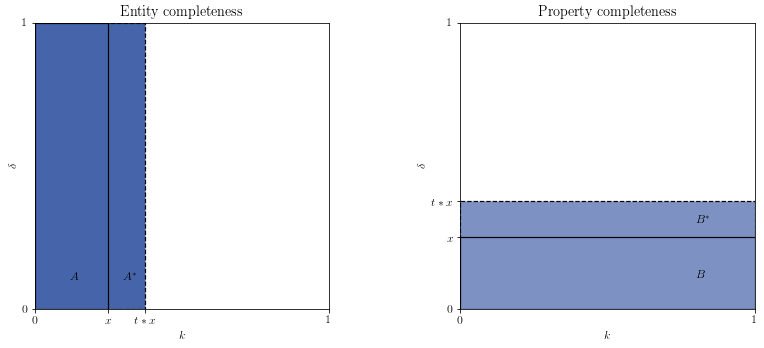

In [11]:
# Types of completeness

fig, axes = plt.subplots(1, 2, sharex="none", sharey="none", figsize=(12, 5))

lw = 1.2
x = 0.25
xt = 0.375

axes[0].set_title("Entity completeness")
axes[0].set_xlabel("$k$")
axes[0].set_ylabel("$\delta$")
axes[0].set_xticks(ticks=[0, x, xt, 1])
axes[0].set_xticklabels(["$0$", "$x$", "$t*x$", "$1$"])
axes[0].set_yticks(ticks=[0, 1])
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].bar(0, 1, width=xt, align="edge", color=kit_blue_1, edgecolor="black", linestyle="--", linewidth=lw)
axes[0].bar(0, 1, width=x, align="edge", color=kit_blue_1, edgecolor="black", linestyle="-", linewidth=lw, label="mylabel")
# ax2.plot(k, ncomp_abs, color="black", linestyle="dotted")
axes[0].annotate("$A$", xy=(0.12, 0.1))
axes[0].annotate("$A^{*}$", xy=(0.3, 0.1))

axes[1].set_title("Property completeness")
axes[1].set_xlabel("$k$")
axes[1].set_ylabel("$\delta$")
axes[1].set_xticks(ticks=[0, 1])
axes[1].set_yticks(ticks=[0, x, xt, 1])
axes[1].set_yticklabels(["$0$", "$x$", "$t*x$", "$1$"])
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].bar(0, xt, width=1, align="edge", color=kit_blue_2, edgecolor="black", linestyle="--", linewidth=lw)
axes[1].bar(0, x, width=1, align="edge", color=kit_blue_2, edgecolor="black", linestyle="-", linewidth=lw)
# ax2.plot(k, ncomp_abs, color="black", linestyle="dotted")
axes[1].annotate("$B$", xy=(0.8, 0.11))
axes[1].annotate("$B^{*}$", xy=(0.8, 0.3))

plt.subplots_adjust(wspace=50, hspace=10)
plt.tight_layout()

fig.savefig("completeness-types.pdf") # bbox_inches='tight'

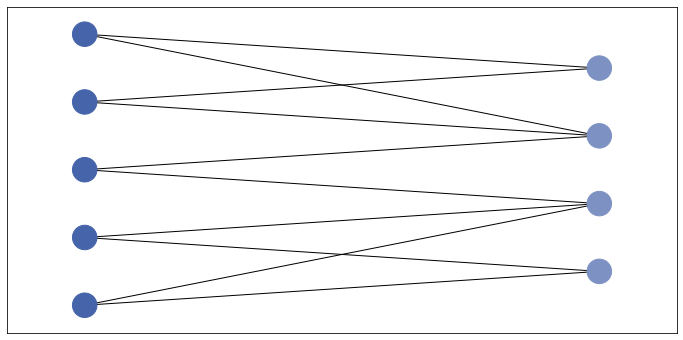

In [38]:
# Example bipartite graphs
import copy

G = nx.Graph()
top = ["Clara", "Eusebius", "Florestan", "Pierrot", "Robert"]
bot = ["dateofbirth", "friend", "member", "key"]
G.add_nodes_from(top, bipartite=0)
G.add_nodes_from(bot, bipartite=1)
# Full connected graph
# G.add_edges_from([("Clara","dateofbirth"),("Clara","friend"),("Clara","member"),("Clara","key"),
#                     ("Eusebius","dateofbirth"),("Eusebius","friend"),("Eusebius","member"),("Eusebius","key"),
#                     ("Florestan","dateofbirth"),("Florestan","friend"),("Florestan","member"),("Florestan","key"),
#                     ("Pierrot","dateofbirth"),("Pierrot","friend"),("Pierrot","member"),("Pierrot","key"),
#                     ("Robert","dateofbirth"),("Robert","friend"),("Robert","member"),("Robert","key")])
# FiveFour graph
# G.add_edges_from([("Clara","dateofbirth"),("Clara","friend"),("Clara","member"),
#                     ("Eusebius","dateofbirth"),("Eusebius","friend"),("Eusebius","member"),
#                     ("Florestan","dateofbirth"),("Florestan","friend"),("Florestan","member"),("Florestan","key"),
#                     ("Pierrot","friend"),("Pierrot","member"),
#                     ("Robert","key")])
# Disconnected graph
# G.add_edges_from([("Clara","dateofbirth"),
#                     ("Eusebius","friend"),
#                     ("Florestan","member"),
#                     ("Pierrot","key")])
# Two Cluster graph
G.add_edges_from([("Clara","dateofbirth"),("Clara","friend"),
                    ("Eusebius","dateofbirth"),("Eusebius","friend"),
                    ("Florestan","friend"),("Florestan","member"),
                    ("Pierrot","member"),("Pierrot","key"),
                    ("Robert","member"),("Robert","key")])

color_dict = {0: kit_blue_1, 1: kit_blue_2}
color_list = [color_dict[i[1]] for i in G.nodes.data("bipartite")]
# print(f"n_t {len(top)}, n_b {len(bot)}, m {G.number_of_edges()}")

# bi_layout = nx.bipartite_layout(G, top, align="horizontal", aspect_ratio=20, scale=1)
# nx.draw_networkx(G, bi_layout, font_size=10, edge_color="grey", node_color=color_list)

bot_len = len(bot)
pos = dict()
pos.update((n, (0.1, i*0.2)) for i, n in enumerate(top))
pos.update((n, (0.3, i*0.2 + 0.1)) for i, n in enumerate(bot))
labelpos = copy.deepcopy(pos)

fig, axes = plt.subplots(1, 1, figsize=(12, 6))
# limitss = axes.axis('off')
# limitsp = axes.axis('off')

nx.draw_networkx(G, pos=pos, ax=axes, font_size=12, node_size=600, edge_color="black", node_color=color_list, with_labels=False)
# nx.draw_networkx_edges(G, pos=pos, ax=axes, edge_color="black")
# nx.draw_networkx_labels(G, pos=pos, ax=axes, font_size=20)

fig.savefig("graph.pdf")

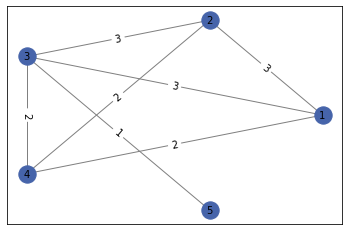

In [14]:
# Example onemode graphs
G = nx.Graph()
# Top mode
# FiveFour graph
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_weighted_edges_from([(1,2,3),(1,3,3),(1,4,2),
                            (2,3,3),(2,4,2),
                            (3,4,2),(3,5,1)])

nx.draw_networkx(G, pos=nx.circular_layout(G, scale=1), font_size=10, edge_color="grey", node_color=kit_blue_1)
labels = nx.get_edge_attributes(G, 'weight')
_ = nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G, scale=1), edge_labels=labels, font_size=10)

# Full connected graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),(1,"d"),
#                     (2,"a"),(2,"b"),(2,"c"),(2,"d"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"a"),(4,"b"),(4,"c"),(4,"d"),
#                     (5,"a"),(5,"b"),(5,"c"),(5,"d")])

# Disconnected graph
# G.add_edges_from([(1,"a"),
#                     (2,"b"),
#                     (3,"c"),
#                     (4,"d")])
# 2 Cluster graph
# G.add_edges_from([(1,"a"),(1,"b"),
#                     (2,"a"),(2,"b"),
#                     (3,"b"),(3,"c"),
#                     (4,"c"),(4,"d"),
#                     (5,"c"),(5,"d")])

# G.add_nodes_from(["a", "b", "c", "d"])